# Stork Diary

## 20200225 15:00 28.40买入万业企业 600641 100股

收盘时买入，后期应该盘中买入。买股票是投资不是投机，设定好交易策略，认赌要服输。

### MACD DIf DEA 红绿柱

$Dif = EMA_{12} - EMA_{26}$ 
DIF代表长短期均线之间的差，绝对值越大，代表股票上涨或下跌呈加速状态。
顶背离股价上涨 DIF下降，上涨势头越来越弱，曲线越来越到最高点
底背离  代表下跌势头减弱
DIF>0;则金叉适合买 死叉意味着上涨势头变弱
$DEA = DIF_9$
开盘价不一定等于收盘价

### 做T

做T需要流动资金，因此在投资时不要一波进，像定投股票
1.下降趋势
2.震荡趋势
3.上升趋势

## 20200226 跌300

## 20200226 跌141

## 20200301

避免短线频繁交易，不要尝试抓住每一次波动；避免逆势操作下跌很多时买入也未必好；避免重仓交易，留下流动资金；减少无意义的工作和干扰，时刻盯着报价系统，其实小波动是无意义的，试着重新开始。

## 20200319

In [4]:
万业：收盘价：22.95；涨幅：7.65%
东方航空：4.10；涨幅：-3.76%
先去实现一些简单的策略
1.股票价格间关联 两两关联。傅里叶变换到矢量空间?用处？

2.vn.py

SyntaxError: invalid character in identifier (<ipython-input-4-be7748b3a94c>, line 1)

# 量化系统 

## python 內建函数

### range(start,stop[,step]),

In [2]:
list(range(5,10,1))

[5, 6, 7, 8, 9]

### map(function,iter, ...)

In [3]:
print(list(map(lambda x: x**2,range(5,100,5))))

[25, 100, 225, 400, 625, 900, 1225, 1600, 2025, 2500, 3025, 3600, 4225, 4900, 5625, 6400, 7225, 8100, 9025]


In [4]:
print(list(map(lambda x,y: x+y,range(1,6),range(8,13))))

[9, 11, 13, 15, 17]


###  reduce(function,iterable) 

reduce(f,[x1,x2,x3,x4]) = f(f(f(x1,x2),x3),x4)

In [107]:
from functools import reduce
def add(x,y):
    return x+y
print(reduce(add,range(1,9,2)))
print(reduce(add,[1,3,5,7],8))

16
24


### filter(f,i)

In [1]:
def filter_range(n):
    return (n>=5) & (n<11)
print(list(filter(filter_range,[1,2,4,5,6,9,10,15])))

[5, 6, 9, 10]


### sorted(iter,key,reverse)

In [7]:
print(sorted(['A','a','b','f','d']))
L = [('MSFT',92),('APPL',175),('IBKR',70)]
print(sorted(L,key=lambda x : x[0]))
print(sorted(L,key=lambda x : x[1]))

['A', 'a', 'b', 'd', 'f']
[('APPL', 175), ('IBKR', 70), ('MSFT', 92)]
[('IBKR', 70), ('MSFT', 92), ('APPL', 175)]


## Numpy

### 初始化操作

In [5]:
import numpy as np
np.zeros(100)
np.zeros((3,2))
np.ones((3,2))
np.empty((2, 3, 3))

np_list = np.arange(10000)
np.ones_like(np_list)
np.zeros_like(np_list)

np.eye(3) #单位阵

data = [[1,2,3,4],[5,6,7,8]]
arr_np = np.array(data)
arr_np

np.linspace(0,1,10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

### 索引选取和切片操作

In [6]:
stork_cnt = 200
view_days = 504
stork_day_change = np.random.standard_normal((stork_cnt,view_days))
tmp  = stork_day_change[0:2,0:5].copy()
stork_day_change[0:2, 0:5] = stork_day_change[-2:, -5:]
stork_day_change[-2:, -5:] = tmp
stork_day_change[-2:, -5:] 

array([[-0.16108292,  1.02975466,  0.44406787, -1.51687266, -0.27745183],
       [-2.25404891,  0.51525436,  0.11222706, -1.67216066, -0.90572046]])

### 数据转换与规整

In [7]:
#转换数据类型
stork_day_change[0:2 ,0:5].astype(int)
#保留小数点数位
np.around(stork_day_change[0:2 ,0:5],2)
#nan 数据处理
tmp_test = stork_day_change[0:2, 0:5].copy()
tmp_test[0][0] = np.nan
tmp_test

array([[        nan, -0.47557502, -0.57357117,  0.46131483,  1.67220565],
       [-0.73320348,  0.68804659, -2.48989139, -0.45236377, -0.35177484]])

In [8]:
tmp_test = np.nan_to_num(tmp_test)
tmp_test

array([[ 0.        , -0.47557502, -0.57357117,  0.46131483,  1.67220565],
       [-0.73320348,  0.68804659, -2.48989139, -0.45236377, -0.35177484]])

### 逻辑条件进行数据筛选

In [9]:
mask = stork_day_change[0:2, 0:5] >0.5
mask #bool

array([[False, False, False, False,  True],
       [False,  True, False, False, False]])

In [10]:
tmp_test = stork_day_change[0:2, 0:5].copy()
tmp_test[mask]

array([1.67220565, 0.68804659])

In [11]:
tmp_test[tmp_test>0.5] 
tmp_test[tmp_test>0.5] = 1

### 通用序列函数

In [12]:
np.all(mask)

False

In [13]:
np.any(mask)#是否有true

True

In [14]:
np.maximum(stork_day_change[0:2, 0:5],stork_day_change[-2:, -5:])

array([[-0.16108292,  1.02975466,  0.44406787,  0.46131483,  1.67220565],
       [-0.73320348,  0.68804659,  0.11222706, -0.45236377, -0.35177484]])

In [15]:
change_int = stork_day_change[0:2 ,0:5].astype(int)
print(change_int)
np.unique(change_int)

[[ 0  0  0  0  1]
 [ 0  0 -2  0  0]]


array([-2,  0,  1])

In [16]:
print(stork_day_change[0:2, 0:5])
np.diff(stork_day_change[0:2, 0:5]) # 默认axis=1
np.diff(stork_day_change[0:2, 0:5],axis=0)

[[-0.81554038 -0.47557502 -0.57357117  0.46131483  1.67220565]
 [-0.73320348  0.68804659 -2.48989139 -0.45236377 -0.35177484]]


array([[ 0.0823369 ,  1.16362161, -1.91632022, -0.9136786 , -2.02398048]])

In [17]:
np.where(tmp_test>0.5, 1, 0) #
np.where(tmp_test>0.5, 1, tmp_test)
np.where(np.logical_and(tmp_test>0.5, tmp_test<1), 1, 0)
np.where(np.logical_or(tmp_test>0.5, tmp_test<-0.5), 1, 0)

array([[1, 0, 1, 0, 1],
       [1, 1, 1, 0, 0]])

## 基础统计概念与函数 

In [18]:
#np.max()
#np.min()
#np.std()
#np.mean()
stork_day_change_four = stork_day_change[:4, :4]
print(stork_day_change_four)
np.argmax(stork_day_change_four,axis=0)

[[-0.81554038 -0.47557502 -0.57357117  0.46131483]
 [-0.73320348  0.68804659 -2.48989139 -0.45236377]
 [ 1.75631294  1.86704735  0.00540334 -0.85525186]
 [ 0.87514426  0.81781744 -0.19580659  1.45424756]]


array([2, 2, 2, 3])

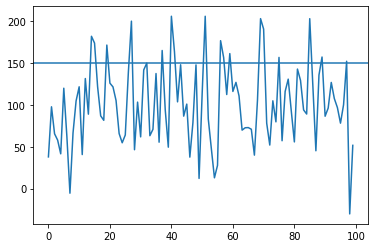

In [19]:
import matplotlib.pyplot as plt
a_investor = np.random.normal(loc=100,scale=50,size=(100,1))
plt.plot(a_investor)
plt.axhline(a_investor.mean()+a_investor.std())

###  histogram 和拟合曲线

/home/gysun/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


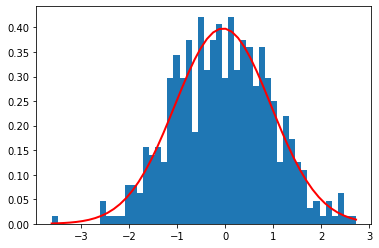

In [20]:
import scipy.stats as scs
plt.hist(stork_day_change[0],bins=50,normed=True)
fit_linspace = np.linspace(stork_day_change[0].min(),stork_day_change[0].max())
pdf = scs.norm(stork_day_change[0].mean(), stork_day_change[0].std()).pdf(fit_linspace)
plt.plot(fit_linspace,pdf, lw=2, c='r')

### 正态分布买入策略 

[-66.52942706 -47.38194491 -45.38904121]
买入第[ 77  78 151]只股票，从第454个交易日开始持有盈亏：30.90%


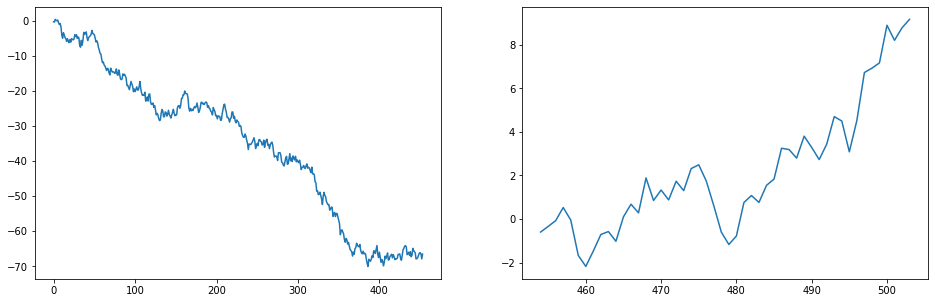

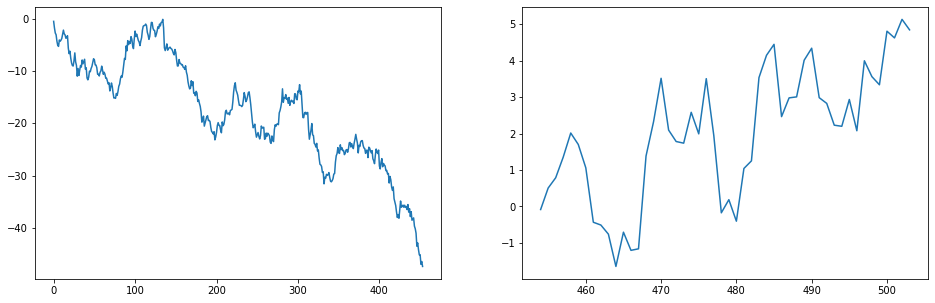

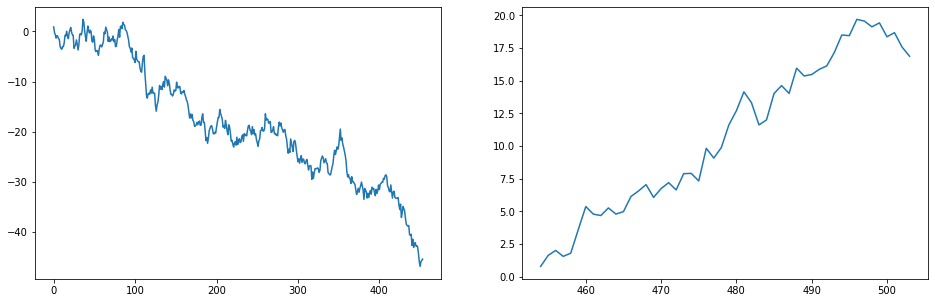

In [21]:
import numpy as np
import matplotlib.pyplot as plt
#np.sort()
#np.argsort() 排序后的元素在原序列的原序号

view_days = 504
keep_days = 50 #保留后50天
stork_day_change_test =  stork_day_change[:stork_cnt, 0:view_days - keep_days]
# 找出跌幅最大的三只股票
print(np.sort(np.sum(stork_day_change_test,axis=1))[:3])
stork_lower_array = np.argsort(np.sum(stork_day_change_test,axis=1))[:3]
stork_lower_array

def show_buy_lower(stork_ind):
    '''
    :param stork_ind :股票序号，
    :return:
    '''
    _, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,5))
    axs[0].plot(np.arange(0,view_days - keep_days),stork_day_change_test[stork_ind].cumsum())
    #np.cumsum() 连续求和
    cs_buy = stork_day_change[stork_ind][view_days-keep_days:view_days].cumsum()
    axs[1].plot(np.arange(view_days-keep_days,view_days),cs_buy)
    return cs_buy[-1]

profit = 0 
for stork_ind in stork_lower_array:
    profit += show_buy_lower(stork_ind)
print ('买入第{}只股票，从第454个交易日开始持有盈亏：{:.2f}%'.format(stork_lower_array, profit))
plt.show()

### 伯努利分布 

In [22]:
import numpy as np
import matplotlib.pyplot as plt
w = np.random.binomial(1,0.5)
print(w)

1


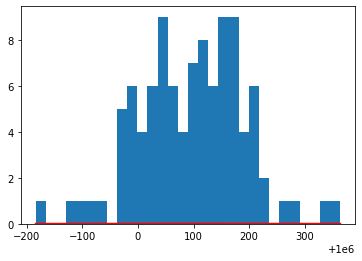

In [23]:
import scipy.stats as scs
gamblers = 100
def casino(win_rate, win_once=1, loss_once=1, commission=0.01):
    '''
    money: 1,000,000, playtime: 1,000,000
    win_rate: possibility for win
    loss_once、win_once : the amount money for once win or loss
    commission: commission 手续费
    '''
    my_money = 1000000
    play_cnt = 10000
    commission = commission
    for _ in np.arange(0,play_cnt):
        w = np.random.binomial(1,win_rate)
        if w:
            my_money += win_once
        else:
            my_money -= loss_once
        my_money -= commission
        if my_money <= 0:
            break
    return my_money
heaven_moneys = [casino(0.5, 1.02, 0.98, 0.01) for _ in np.arange(0, gamblers)]
heaven_moneys = np.array(heaven_moneys)
_ = plt.hist(heaven_moneys, bins=30)
fit_linspace = np.linspace(heaven_moneys.min(),heaven_moneys.max())
pdf = scs.norm(heaven_moneys.mean(), heaven_moneys.std()).pdf(fit_linspace)
plt.plot(fit_linspace,pdf, lw=2, c='r')

## MC Forecasting Stock Prices

In [24]:
import numpy as np
import pandas as pd
from distutils.version import LooseVersion
pd.__version__
print(LooseVersion(pd.__version__))
print(LooseVersion('0.20.0'))
print((LooseVersion(pd.__version__) >= LooseVersion('0.20.0')))


0.25.1
0.20.0
True


2020的pandas1.0.1 弃用了Deprecate / Remove pandas.util.testing.assert_raises_regex 
https://github.com/pandas-dev/pandas/issues/29187
而pandas.datareader 没有改
换用0.25.0 版本pandas 解决

In [25]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

ticker = '600641.SS'
data = pd.DataFrame()
#data = wb.DataReader(ticker, data_source='yahoo',start='2017-1-1')
#print(data)
data[ticker] = wb.DataReader(ticker, data_source='yahoo',start='2019-1-1')['Adj Close']
#print(data)

In [26]:
log_returns = np.log(1 + data.pct_change())#pct_change: (x_i+1 - x_i) / x_i 

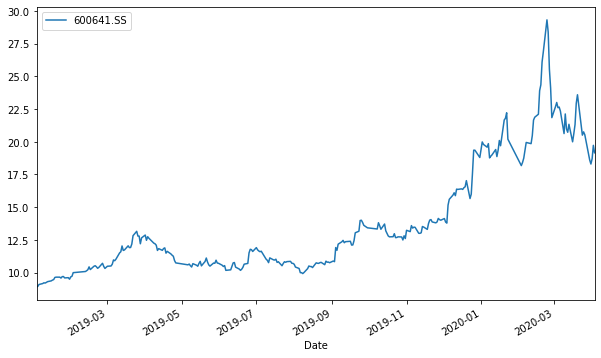

In [27]:
data.plot(figsize=(10,6))

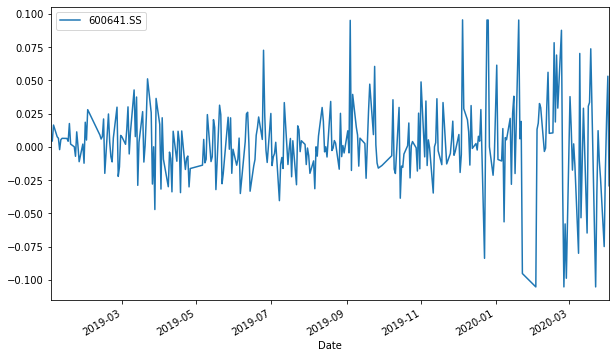

In [28]:
log_returns.plot(figsize=(10,6))

$drift = u-\frac{1}{2} var$;\\

$r = drift + stdev*exp(r)$

In [29]:
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5*var)
stdev = log_returns.std()

In [30]:
z = norm.ppf(np.random.rand(10,2))
z

array([[-0.65733915,  0.48681894],
       [-1.62910991, -0.35551983],
       [ 0.68728245, -0.09623104],
       [-0.25087904, -0.9927418 ],
       [ 1.3719999 ,  0.34309014],
       [ 2.06924872,  0.03350384],
       [-0.29042476, -0.5784535 ],
       [-0.88293539,  0.40454684],
       [ 0.43403645, -1.01333381],
       [ 0.70329984, -0.62653879]])

$r = drift + stdev*z$

In [31]:
t_intervals =1000
iterations = 10
daily_returns = np.exp(drift.values+stdev.values*norm.ppf(np.random.rand(t_intervals,iterations)))
daily_returns

array([[1.03342752, 0.99220491, 1.01062766, ..., 1.0223262 , 1.05272349,
        1.07308902],
       [0.98449221, 0.91992461, 0.97463377, ..., 1.07372272, 0.99600743,
        1.05132541],
       [1.02412987, 1.02759058, 1.02791076, ..., 0.96934375, 1.06089158,
        0.97486916],
       ...,
       [1.02073472, 1.07709615, 1.01093506, ..., 1.02820848, 1.00521189,
        1.00842465],
       [1.04960992, 1.03321535, 0.95684413, ..., 1.03692675, 1.01984186,
        0.9799597 ],
       [0.9620912 , 1.00117649, 0.97417623, ..., 0.98049766, 1.01157331,
        1.02707589]])

In [32]:
s0 = data.iloc[-100]
s0


600641.SS    13.47
Name: 2019-11-07 00:00:00, dtype: float64

In [33]:
price_list = np.zeros_like(daily_returns)

In [34]:
price_list[0] = s0
price_list

array([[13.47000027, 13.47000027, 13.47000027, ..., 13.47000027,
        13.47000027, 13.47000027],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

$S_i = S_{i-1}*daily\_returns_i$

In [35]:
for t in range(1,t_intervals):
    price_list[t] = price_list[t-1]*daily_returns[t]
price_list

array([[ 13.47000027,  13.47000027,  13.47000027, ...,  13.47000027,
         13.47000027,  13.47000027],
       [ 13.26111036,  12.39138474,  13.12831709, ...,  14.46304528,
         13.41622031,  14.16135359],
       [ 13.58109928,  12.73327027,  13.49473839, ...,  14.01966259,
         14.23315516,  13.80546682],
       ...,
       [205.20513008, 107.71026131,  34.67594079, ...,  43.56317349,
        130.47746014, 108.49022731],
       [215.38533966, 111.28789577,  33.17947048, ...,  45.17182   ,
        133.06637551, 106.31605079],
       [207.22033904, 111.41882434,  32.32265139, ...,  44.29086374,
        134.60639447, 109.19465291]])

AttributeError: 'Line2D' object has no property 'fmt'

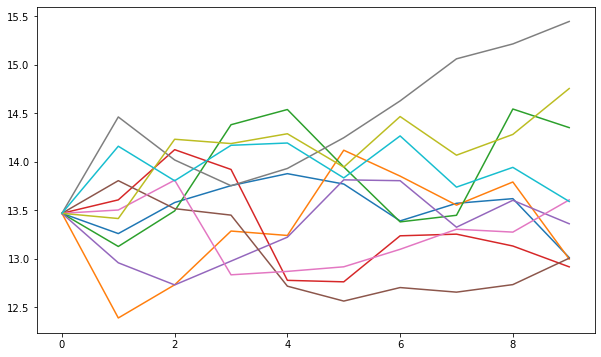

In [39]:
fig = plt.figure(figsize=(10,6))
plt.plot(price_list[:10,:])
data_array = data[-100:90].values
plt.plot(data_array,fmt='o',label='O')
plt.legend()
#data_array
#data[-100:-90].plot()
plt.show()

## TA-Lib

Techincal Analysis Library

install:  https://mrjbq7.github.io/ta-lib/install.html
1.先装依赖再pip3 
Download ta-lib-0.4.0-src.tar.gz and:
$ tar -xvf ta-lib-0.4.0-src.tar.gz  
$ ./configure --prefix=/usr
$ make
$ sudo make install

pip3 install LA-Lib

In [40]:
import numpy
import talib
from talib import MA_Type

close = numpy.random.random(100)
output = talib.SMA(close)
#output


upper, middle, lower = talib.BBANDS(close, matype=MA_Type.T3)
upper

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan, 0.92098641,
       0.7538729 , 0.88211961, 0.74948874, 0.86245325, 0.84691947,
       0.84788105, 1.05261117, 1.13936246, 1.28053843, 1.15944177,
       0.95588963, 1.26953272, 1.26006237, 1.20211502, 1.06326266,
       0.94769978, 1.05549634, 1.14431104, 1.0775664 , 0.94305354,
       0.86986661, 0.43478943, 0.79981143, 1.02502715, 1.09742805,
       1.16655643, 1.20837843, 1.21378872, 1.22932139, 1.18832061,
       0.96763507, 0.89493232, 0.86769426, 0.90363543, 0.9370258 ,
       0.93714873, 0.90273724, 0.98736436, 1.20047354, 1.14538326,
       1.17279669, 1.15603642, 1.18699636, 1.0376823 , 0.89345454,
       0.96574132, 1.13345803, 1.25544987, 1.30778021, 1.27672

## vn.py

install : https://www.vnpy.com/docs/cn/install.html#ubuntu

## python递归函数，EMA

In [8]:
def fact(n):
    if n==1:
        return 1
    return n * fact(n-1)
print(fact(6))

720


### $EMA_t = \alpha * Price + (1-\alpha) * EMA_{t-1}$

$\alpha$ 为平滑指数，一般取作1/(n+1)

#### 自定义

In [17]:
import pandas as pd
a = 2/7
prices = list(range(10))
print(prices)
def cal_EMA(T,Prices):
    if T<1 :
        return Prices[0]
    return (1-a)*cal_EMA(T-1,Prices)+a*Prices[T]

pd.Series([cal_EMA(t,prices) for t in range(10)])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


0    0.000000
1    0.285714
2    0.775510
3    1.411079
4    2.150771
5    2.964836
6    3.832026
7    4.737161
8    5.669401
9    6.621001
dtype: float64

#### pandas 递归

In [18]:
recursion_df = pd.DataFrame({'test':prices})
recursion_result = recursion_df.ewm(alpha=2/7, adjust=False).mean()
print(recursion_result)

       test
0  0.000000
1  0.285714
2  0.775510
3  1.411079
4  2.150771
5  2.964836
6  3.832026
7  4.737161
8  5.669401
9  6.621001


#### Ta-lib

In [21]:
import talib as ta
import numpy as np

ta.EMA(np.array(prices,dtype=np.float64),9)

array([nan, nan, nan, nan, nan, nan, nan, nan,  4.,  5.])

## Python 高级特性

切片

In [22]:
L = ['MSFT','APPL','IBKR','GOOG']

In [24]:
r = []
n = 3
for i in range(n):
    r.append(L[i])
print(r)

r = L[:3]

['MSFT', 'APPL', 'IBKR']


In [25]:
L2 = list(range(20))

L2[:10:2]

[0, 2, 4, 6, 8]

In [26]:
L2[::5]

[0, 5, 10, 15]

迭代

In [28]:
d = {'a': 1,'b': 2, 'c': 3}

In [29]:
#判断是否可迭代
from collections import Iterable
isinstance(d,Iterable)

True

In [30]:
for key in d:
    print(key)

a
b
c


In [31]:
for key in d.values():
    print(key)

1
2
3


In [32]:
for key,values in d.items():
    print(key,values)

a 1
b 2
c 3


生成器: 列表生成式的[]改成()

In [47]:
G = (x*2 for x in range(10))

In [48]:
next(G)

0

In [51]:
def fib(N):
    n,a,b = 0,0,1
    while n<N:
        yield b  # 生成器
        a,b = b, a+b
        n +=1
    return
fib(6)

[1, 1, 2, 3, 5, 8, 13]

In [52]:
list(fib(7))

[1, 1, 2, 3, 5, 8, 13]

迭代器： 生成器都是Iterator,list,dict,str可迭代但不是迭代器，迭代器可用next调用不断返回，是惰性的，需要返回下一个数据时才会计算。数据流较大的。

In [56]:
from collections import Iterator,Iterable
print(isinstance([],Iterator))
print(isinstance([],Iterable))

False
True


In [57]:
iter([1,2,3,4,5])

## Python 异常处理

### 定位与调试

### try/except 捕捉异常

In [63]:
def test_price(p):
    try:
        a = int(p)
    except ValueError:
        print('not number')
        a=0
        b=0
    else:
        b = a+100
    finally:
        print('GO')
    return b
test_price('AAA')

not number
GO


0

### Raise

In [66]:
def check_price(p):
    if p<0:
        raise Exception('invalid price',p)
    print('right')
check_price(-1)

Exception: ('invalid price', -1)

## 面向对象

属性+方法 = 类

*类名用大写，
*属性为名词，
*方法为动词
self 类方法必须被包括且为第一个参数

In [70]:
class StockA:
    price=20
    volume=10000
    def calAmount(self):
        return self.price*self.volume
checkStockA = StockA()
checkStockA.calAmount()

200000

In [73]:
class Stock:
    def getTodayStock(self, stockName, price, volume):
        self.stockName = stockName
        self.price = price
        self.volume = volume
    def calAmount(self):
        return self.price*self.volume
checkStockA = Stock()
checkStockA.getTodayStock('APPL',300,10000)
print(checkStockA.calAmount())

3000000


### init 实例化时自动运行

In [79]:
class Stock:
    def __init__(self, stockName, price, volume):
        self.stockName = stockName
        self.price = price
        self.volume = volume
    def calAmount(self):
        return self.price*self.volume
checkStockA = Stock('APPL',200,1000)
print(checkStockA.calAmount())
checkStockB = Stock('ALI',300,1000)
print(checkStockB.calAmount())

200000
300000


### 公有/私有变量

In [83]:
class stockname:
    __name = 'BABA'
stock = stockname()
stock.__name

AttributeError: 'stockname' object has no attribute '__name'

In [87]:
stockname._stockname__name

'BABA'

### 继承和组合

In [91]:
class Stock:
    def __init__(self, stockName, price, volume):
        self.stockName = stockName
        self.price = price
        self.volume = volume
    def calAmount(self):
        return {self.stockName : self.price*self.volume}

In [92]:
class Stock1(Stock):
    pass
checkStockA = Stock1('APPL',200,1000)
checkStockA.calAmount()

{'APPL': 200000}

#### 属性覆盖

In [96]:
class BuyStock(Stock):
    def __init__(self):
        self.haveCapital = True
    def buy(self):
        if self.haveCapital == True:
            print('buy it')
            self.haveCapital = False
        else:
            print('don"t')
buy = BuyStock('APPL', 200, 20000).calAmount()

TypeError: __init__() takes 1 positional argument but 4 were given

Super 函数

In [101]:
class BuyStock(Stock):
    def __init__(self,stockName, price, volume):
        super().__init__(stockName,price,volume)
        self.haveCapital = True
    def buy(self):
        if self.haveCapital == True:
            print('buy it')
            self.haveCapital = False
        else:
            print('don"t')
buyS = BuyStock('APPL', 200, 20000)
buyS.buy()

buy it


### 类的组合和应用

In [106]:
class StockA:
    def __init__(self, price):
        self.price = price
class StockB:
    def __init__(self, price):
        self.price = price
class TwoStock:
    def __init__(self, priceA, priceB):
        self.priceA = StockA(priceA)
        self.priceB = StockB(priceB)
    def totalPrice(self):
        return self.priceA.price+self.priceB.price
calTwoStork = TwoStock(100,200)
calTwoStork.totalPrice()

300

## 考题

In [108]:
2+3*4/2

8.0

In [141]:
print(7%(5//2))
print('print("print")')
float("210"*int("2"))
int("3"+"4")
A_VARIABLE_NAME = 1
for i in range(10):
    if not i%2==0:
        print(i+1)


1
print("print")
2
4
6
8
10


In [120]:
sqs = [0,1,4,9,16,25,36,49,64,81]
print(sqs[7:5:-1])

[49, 36]


In [121]:
fib = {1:1,2:1,3:2,4:3}
print(fib.get(4,0)+fib.get(7,5))

8


In [122]:
def power(x,y):
    if y==0:
        return 1
    else:
        return x*power(x,y-1)
print(power(2,3))

8


In [125]:
res = list(map(lambda x:x*5,[1,2,3,4]))
print(res[1])

10


In [128]:
l = ['x','y','z']
l.insert(1,'w')
print(l[2])
print(3*'7')
l = [1,1,2,3,5,8,13]
l[l[4]]

y
777


8

In [145]:
def square(x):
    return x*x
def test(func,x):
    print(func(x))
test(square(),42)

TypeError: square() missing 1 required positional argument: 'x'

In [132]:
def fun(*args,**kwargs):
    print(args)
    print(kwargs)
fun(a=1,b=2,c=3)

()
{'a': 1, 'b': 2, 'c': 3}


In [136]:
for word in 'Quanti':
    if word =='i':
        break
    print(word,end='')

Quant

In [137]:
def check_price(price):
    if price <0:
        raise Exception("Invild price!",price)
try:
    check_price(-1)
    print('right')
except Exception as e:
    print(e)
else:
    print('can_trade')

('Invild price!', -1)


In [140]:
d = {r:r**2 for r in range(0,10,2)}
print(d)

{0: 0, 2: 4, 4: 16, 6: 36, 8: 64}
